<a href="https://colab.research.google.com/github/Benjamindavid03/MachineLearningLab/blob/main/Dimensionality_Reduction_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# You can add the parameter data_home to wherever to where you want to download your data

In [106]:
# These are the images
mnist.data.shape

(70000, 784)

In [107]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [109]:
from sklearn.decomposition import PCA
# Make an instance of the Model
#pca = PCA(.95)
pca = PCA()

In [110]:
pca.fit(train_img)
lower_dimensional_data = pca.fit_transform(mnist.data)

In [111]:
pca.n_components_

784

In [112]:
approximation = pca.inverse_transform(lower_dimensional_data)

In [113]:
scaler = StandardScaler()
# Fit on training set only.
mnist.data = scaler.fit_transform(mnist.data)

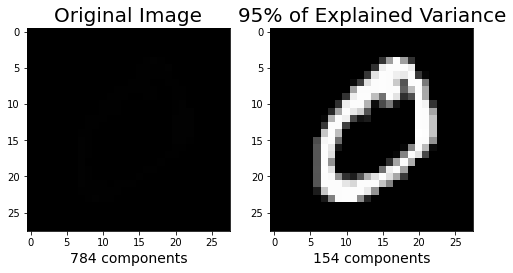

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4));
# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[1].reshape(28,28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);
